In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')   #匯入
df.head() #看資料型態

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df['Species_dummies']  =  df['Species'].apply(lambda x :  0 if x =='Iris-setosa'  else 1 if x =='Iris-versicolor' else 2)  #處理Species出像

In [5]:
df_setosa =  df.groupby('Species')['SepalLengthCm','PetalLengthCm'].mean()
df_setosa

C:\Users\JamesLiu\AppData\Local\Temp\ipykernel_25128\1221424263.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_setosa =  df.groupby('Species')['SepalLengthCm','PetalLengthCm'].mean()


,SepalLengthCm,PetalLengthCm
Species,,
Iris-setosa,5.006,1.464
Iris-versicolor,5.936,4.260
Iris-virginica,6.588,5.552


In [6]:
df_pt  = pd.pivot_table(df,     values=['PetalLengthCm', 'SepalLengthCm'], index = 'Species' )
#      = pd.pivot_table(b_data, values='age', index='marital', columns='conversation', aggfunc=len)
df_pt    #觀察平均長度

,PetalLengthCm,SepalLengthCm
Species,,
Iris-setosa,1.464,5.006
Iris-versicolor,4.260,5.936
Iris-virginica,5.552,6.588


In [7]:
dummy  =  pd.get_dummies(df['Species'])
dummy.columns = ['Species_%s' % x for x in dummy.columns]
dummy

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [8]:
df = pd.concat([df,dummy], axis = 1)


In [9]:
from sklearn import tree
import graphviz

In [10]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [11]:
feature = ['SepalLengthCm' , 'SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [12]:
y = ['Species_dummies']

In [13]:
dt_model.fit(df[feature],df[y])

DecisionTreeClassifier(max_depth=4)

In [14]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=feature,  
    class_names=['Iris-setosa', 'Iris-virginica','Iris-versicolor'],   
    filled=True,     # 貌似是標示出
    rounded= True,   # 讓角變圓
    special_characters=True
) 
graph = graphviz.Source(dot_data)

C:\Users\JamesLiu\AppData\Local\Temp\ipykernel_25128\527908064.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


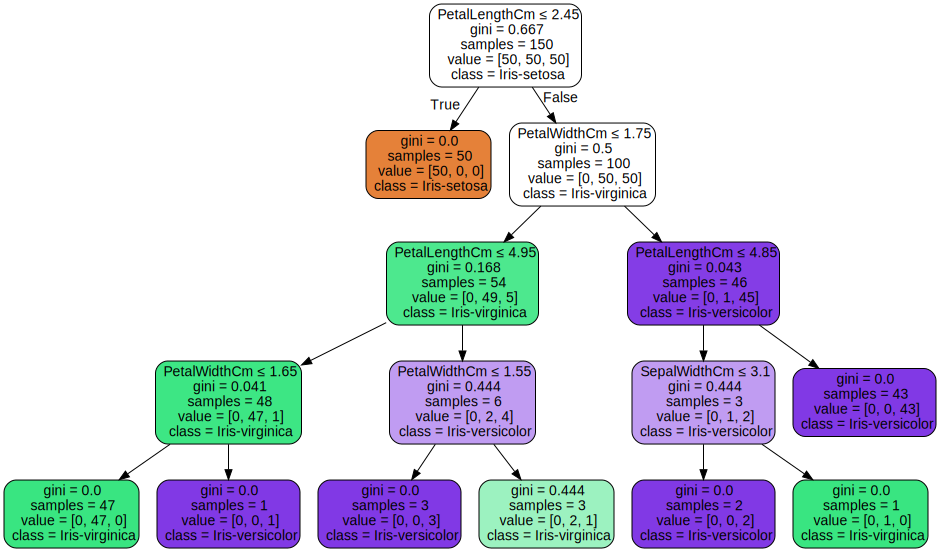

In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))
graph

嘗試改變 Species 的號碼

In [16]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df['Species_dummies2']  =  df['Species'].apply(lambda x :  0 if x =='Iris-setosa'  else 1 if x =='Iris-virginica' else 3)

In [18]:
y2 = ['Species_dummies2']

In [19]:
dt_model.fit(df[feature],df[y2])

DecisionTreeClassifier(max_depth=4)

In [20]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=feature,  
    class_names=['Iris-setosa', 'Iris-virginica','Iris-versicolor'],   
    filled=True,     # 貌似是標示出
    rounded= True,   # 讓角變圓
    special_characters=True)
graph = graphviz.Source(dot_data)

C:\Users\JamesLiu\AppData\Local\Temp\ipykernel_25128\527908064.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


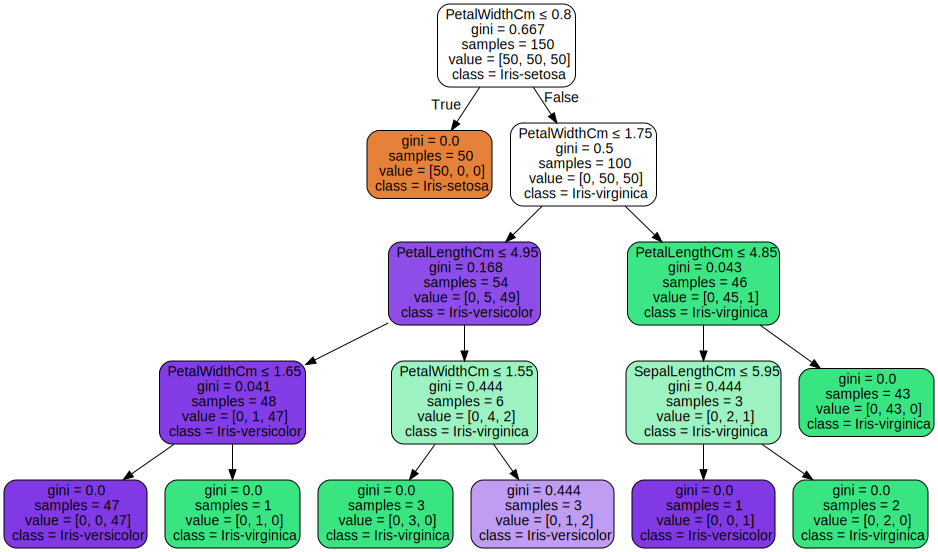

In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))
graph